In [2]:
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from scipy import stats
from scipy.stats import spearmanr, pearsonr
import numpy as np
import time
import pickle as pkl
import sys

sys.path.insert(0, '..')
from livexiv.efficient_eval import *

m = 5 #number of models to re-evaluate at each step

In [19]:
accs, accs_hat = {}, {}
models = {}

name = ''
Y_old = np.hstack([np.load(f"../data/livebench_0{j}.npy", allow_pickle=True) for j in [5]])
Y = np.hstack([np.load(f"../data/livebench_0{j}.npy", allow_pickle=True) for j in [6,7]])
models[name] = {}

# eval in old version
models[name][0] = list(range(0,Y.shape[0]))
Y_list = [Y_old]
M_list = [models[name][0]]
reval_models, _ = EfficEval(Y_list, M_list, m)
assert len(reval_models)==m

# eval in new version
models[name][1] = reval_models
Y_list += [Y[models[name][1]]]
M_list += [models[name][1]]
_, Y_hat = EfficEval(Y_list, M_list, m)

# outputs
accs[name] = 100*Y.mean(1)
accs_hat[name] = 100*Y_hat[1].mean(1)

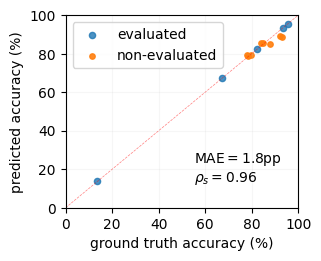

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(3, 2.5))  # 1 row, 2 columns for side-by-side plots

i=0
acc, acc_hat = accs[name], accs_hat[name]
ind = np.zeros(Y.shape[0]).astype(bool)
ind[models[name][1]] = True
axes.scatter(acc[ind], acc_hat[ind], s=20, alpha=.80, label='evaluated')
axes.scatter(acc[~ind], acc_hat[~ind], s=15, alpha=.90, label='non-evaluated')
axes.plot([0, 100], [0, 100], 'r--', lw=.5, alpha=.5)
text = f'MAE$=${np.abs(acc-acc_hat)[~ind].mean():.1f}pp\n$\\rho_s=${spearmanr(acc, acc_hat).statistic:.2f}'
#axes.text(70, 20, text, fontsize=10, bbox=dict(facecolor='white', edgecolor='gray', alpha=0.5))
axes.text(55, 13.5, text, fontsize=10, bbox=dict(facecolor='none', edgecolor='none'))

axes.set_xlabel('ground truth accuracy (%)')
if i==0: axes.set_ylabel('predicted accuracy (%)')
axes.set_xlim(0,100)
axes.set_ylim(0,100)
axes.grid(alpha=.1)

if i==0: axes.legend()
plt.savefig(f'../plots/livebench.pdf', bbox_inches='tight', dpi=400, transparent=False)
plt.show()